# Lab 4: Visualization with Geographic Data

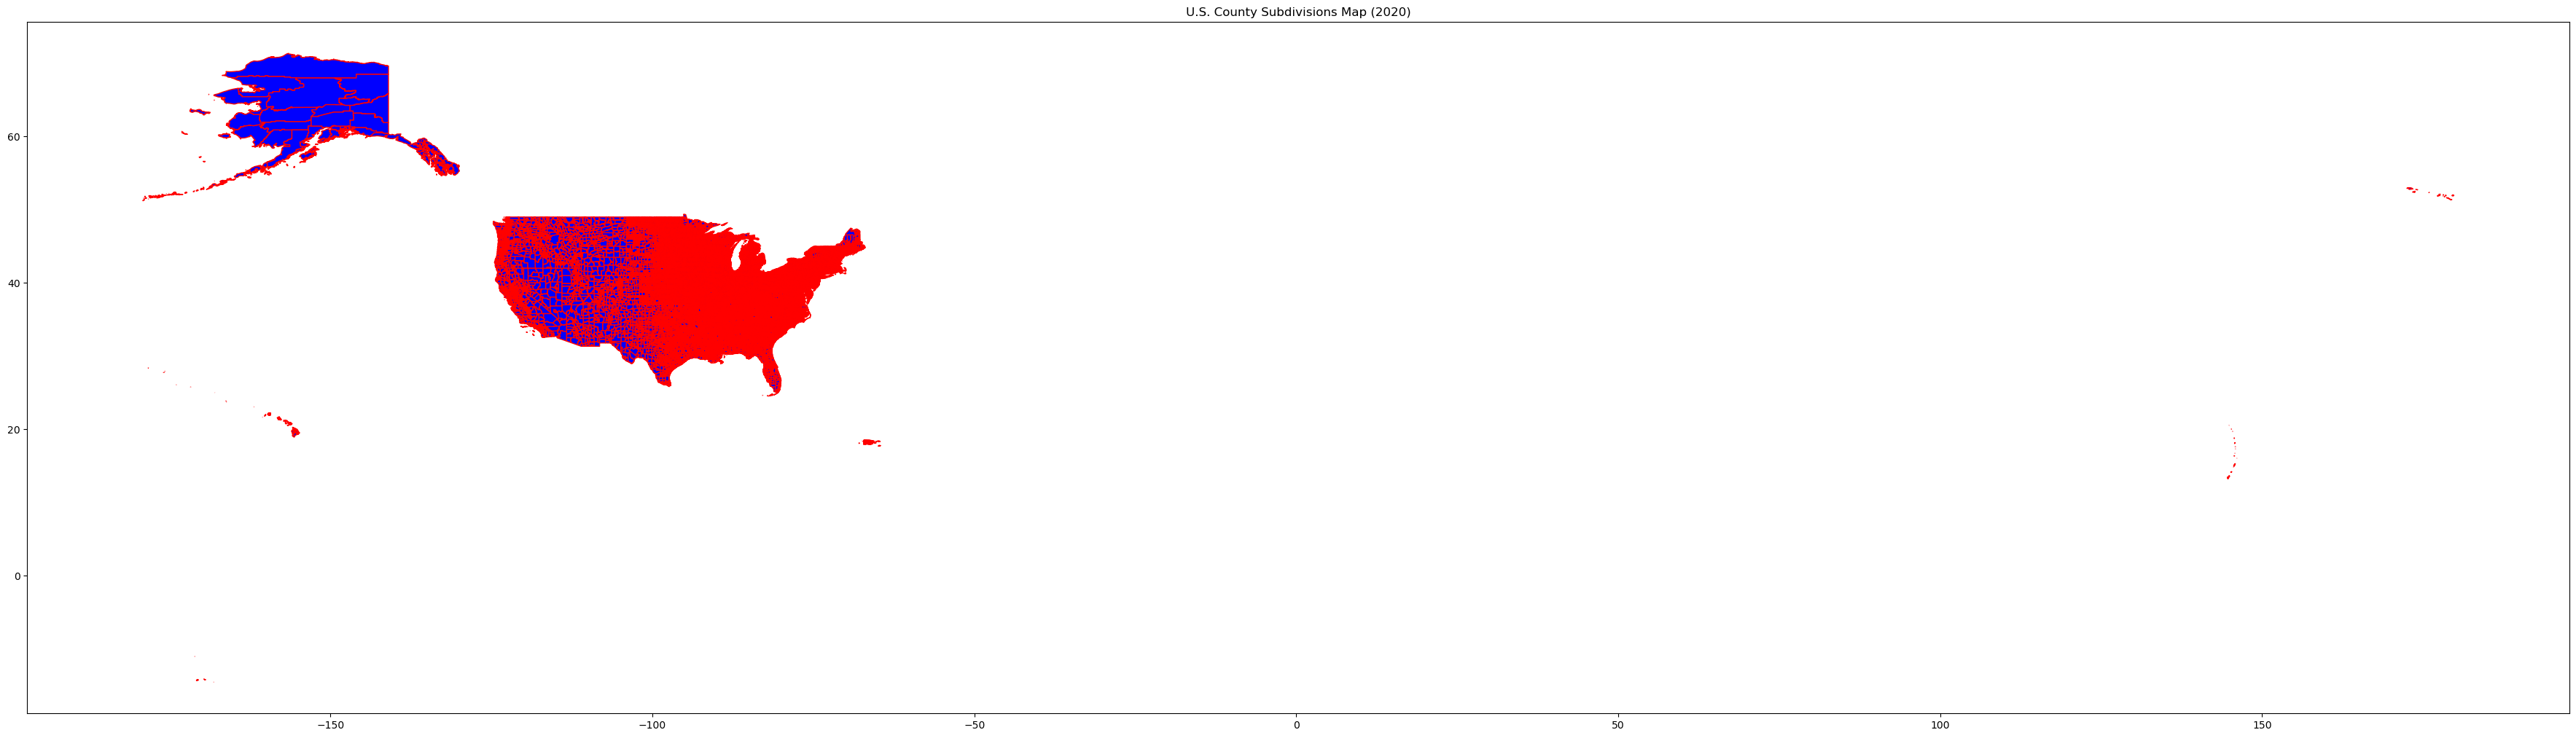

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
gdf = gpd.read_file("cb_2020_us_cousub_500k/cb_2020_us_cousub_500k.shp")

# Plot
fig, ax = plt.subplots(figsize=(45, 30))
gdf.plot(ax=ax, color='blue', edgecolor='red')
ax.set_title('U.S. County Subdivisions Map (2020)')
plt.show()


In [30]:
gdf.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS             AFFGEOID       GEOID  \
0      29      195    22096  00767361  0600000US2919522096  2919522096   
1      38      099    45260  01036531  0600000US3809945260  3809945260   
2      38      017    16100  01036391  0600000US3801716100  3801716100   
3      38      093    22940  01036472  0600000US3809322940  3809322940   
4      38      079    67780  01036243  0600000US3807967780  3807967780   

       NAME           NAMELSAD STUSPS       NAMELSADCO    STATE_NAME LSAD  \
0   Elmwood   Elmwood township     MO    Saline County      Missouri   44   
1    Latona    Latona township     ND     Walsh County  North Dakota   44   
2   Cornell   Cornell township     ND      Cass County  North Dakota   44   
3  Eldridge  Eldridge township     ND  Stutsman County  North Dakota   44   
4   Rolette       Rolette city     ND   Rolette County  North Dakota   25   

       ALAND   AWATER                                           geometry  
0  181233131   377337  POLYGON ((-93.48978 39.06658, -93.48938 39.073...  
1   90848624  2941846  POLYGON ((-98.16255 48.36954, -98.05746 48.369...  
2   93440087        0  POLYGON ((-97.70538 47.04981, -97.70558 47.051...  
3   90001176  2572532  POLYGON ((-98.94567 46.97918, -98.85914 46.979...  
4    2609731        0  POLYGON ((-99.85266 48.6682, -99.83068 48.6681...

## The U.S. map plotted

<Axes: >

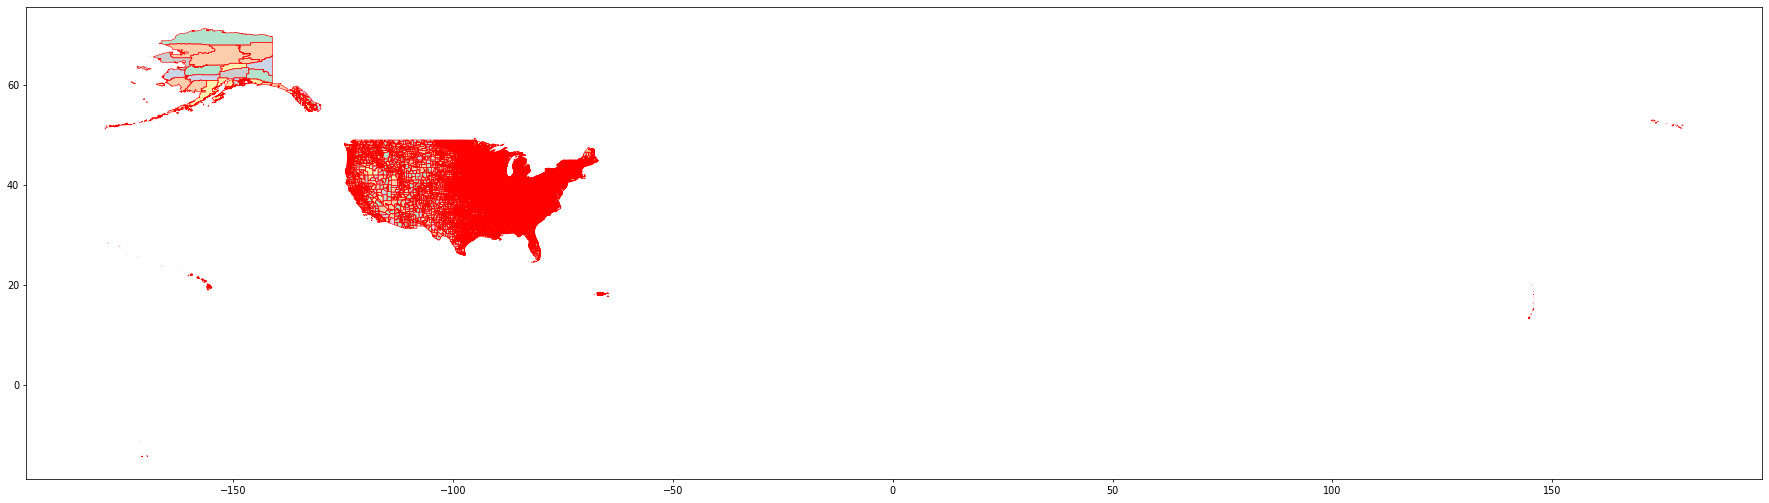

In [15]:
fig = plt.figure(1, figsize=(32, 32), dpi=70) 
ax = fig.add_subplot()

gdf.boundary.plot(ax=ax, color='Red', linewidth=.6)
gdf.plot(ax=ax, cmap='Pastel2', figsize=(42, 42))

In [20]:
# List of excluded states/territories
excluded_states = ['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC']

# Filter the GeoDataFrame
gdf_contiguous = gdf[~gdf['STUSPS'].isin(excluded_states)]
print(len(sorted(gdf_contiguous['STUSPS'].unique())))

48


## Plotting contiguous U.S.

<Axes: >

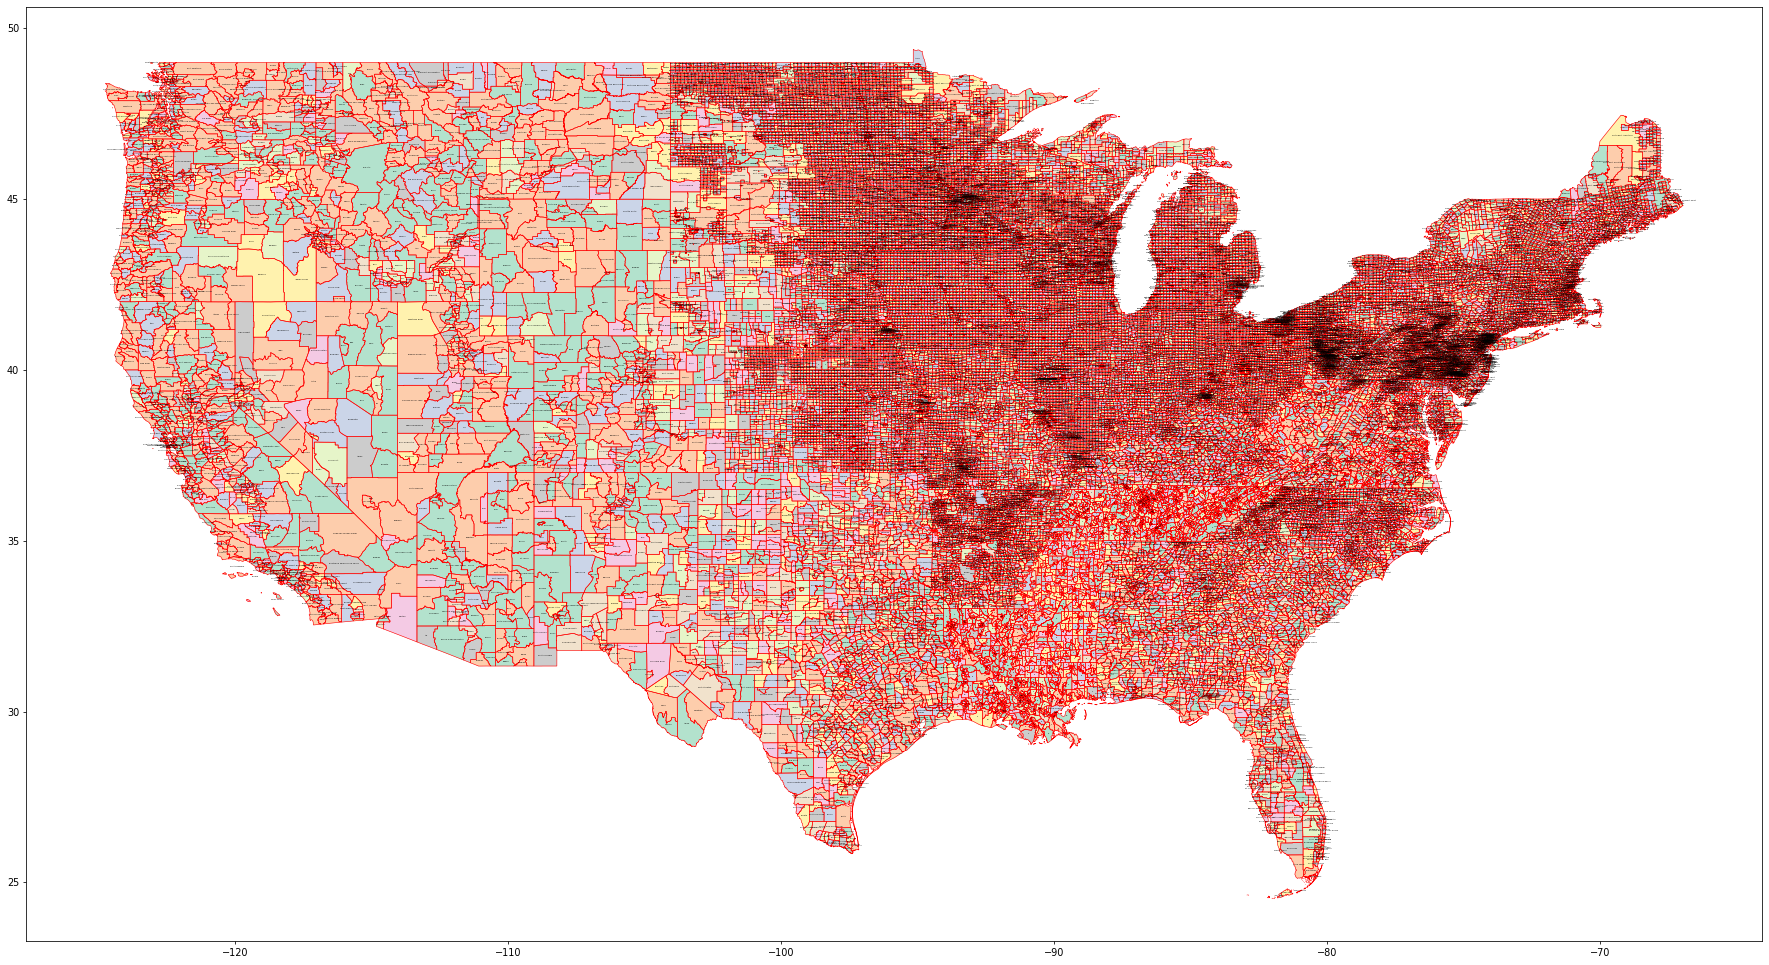

In [29]:
fig = plt.figure(1, figsize=(32, 32), dpi=70) 
ax = fig.add_subplot()

gdf_contiguous.apply(lambda x: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=2), axis=1)
gdf_contiguous.boundary.plot(ax=ax, color='Red', linewidth=.6)

gdf_contiguous.plot(ax=ax, cmap='Pastel2', legend=True, figsize=(42, 42))

Plotting with State Borders:

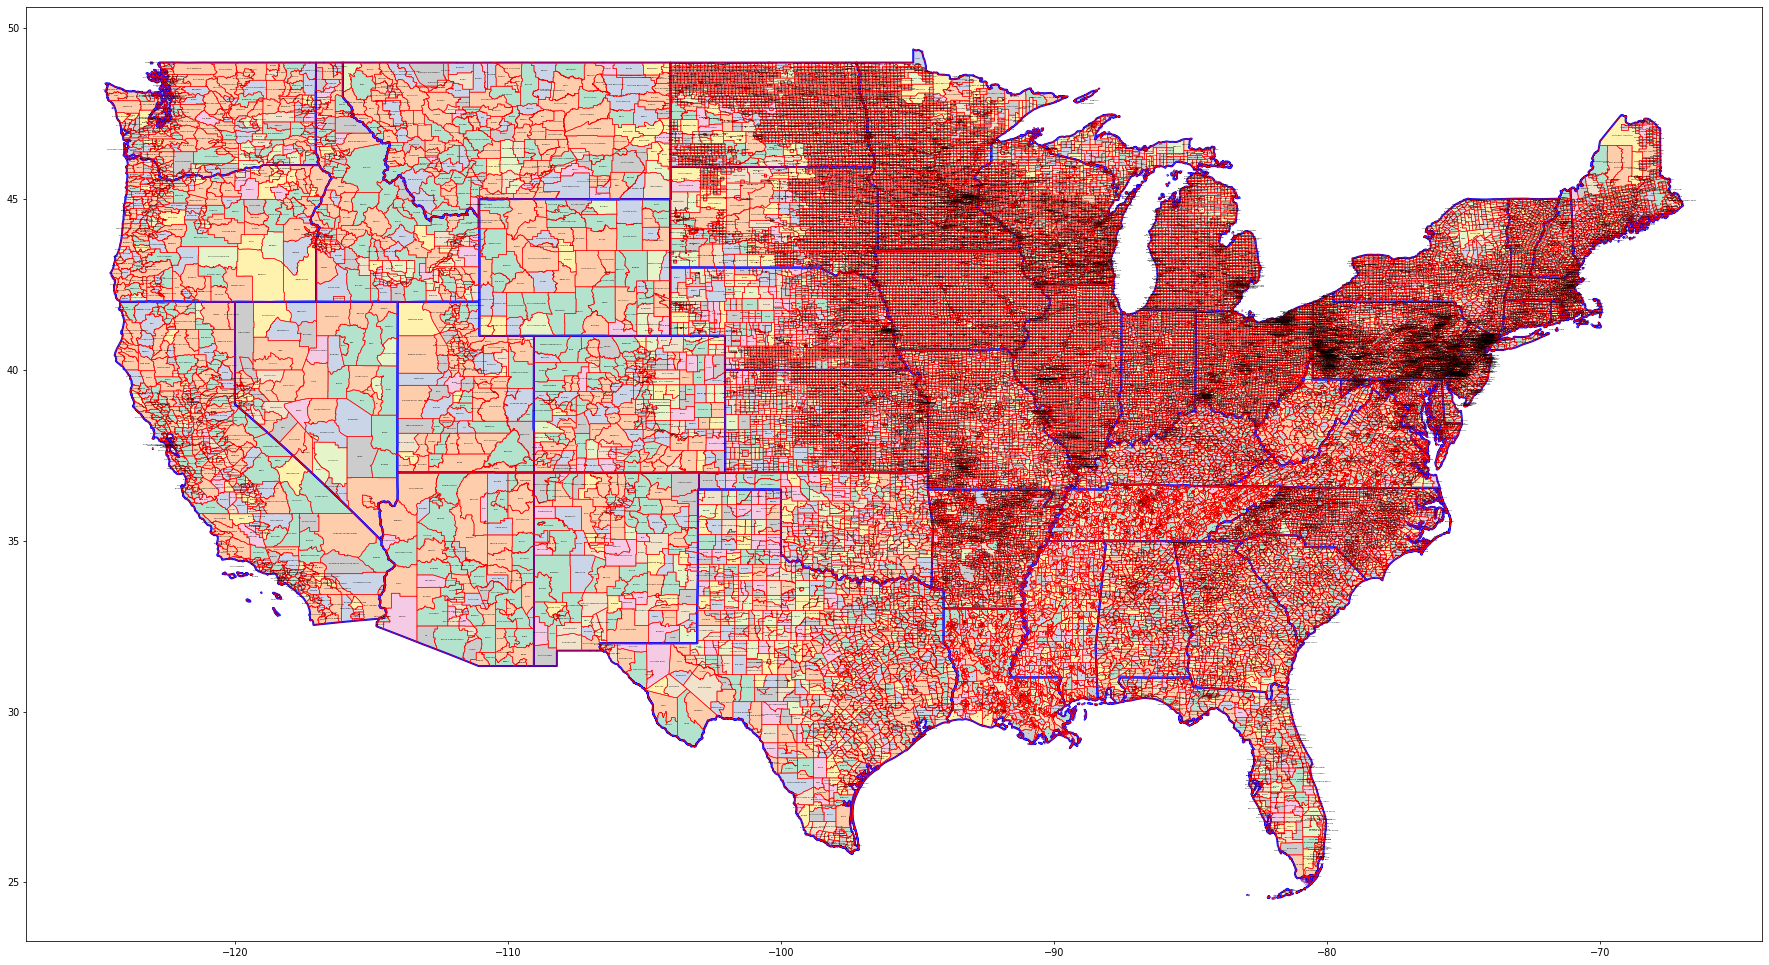

In [28]:
# Dissolve counties into state geometries using STUSPS
states_gdf = gdf_contiguous.dissolve(by='STUSPS')

# Create the figure
fig = plt.figure(1, figsize=(32, 32), dpi=70)
ax = fig.add_subplot()

# Annotate each county name
gdf_contiguous.apply(
    lambda x: ax.annotate(
        x.NAME,
        xy=x.geometry.centroid.coords[0],
        ha='center',
        fontsize=2
    ),
    axis=1
)

# Plot the state borders in blue (merged counties per state)
states_gdf.boundary.plot(ax=ax, color='blue', linewidth=2)

# Plot county borders in red
gdf_contiguous.boundary.plot(ax=ax, color='red', linewidth=0.6)

# Plot the filled counties
gdf_contiguous.plot(ax=ax, cmap='Pastel2', legend=True)

# Done, displaying
plt.show()


# Washington State

In [32]:
wa_states = ['WA']
wa = gdf_contiguous[gdf_contiguous['STUSPS'].isin(wa_states)]

<Axes: >

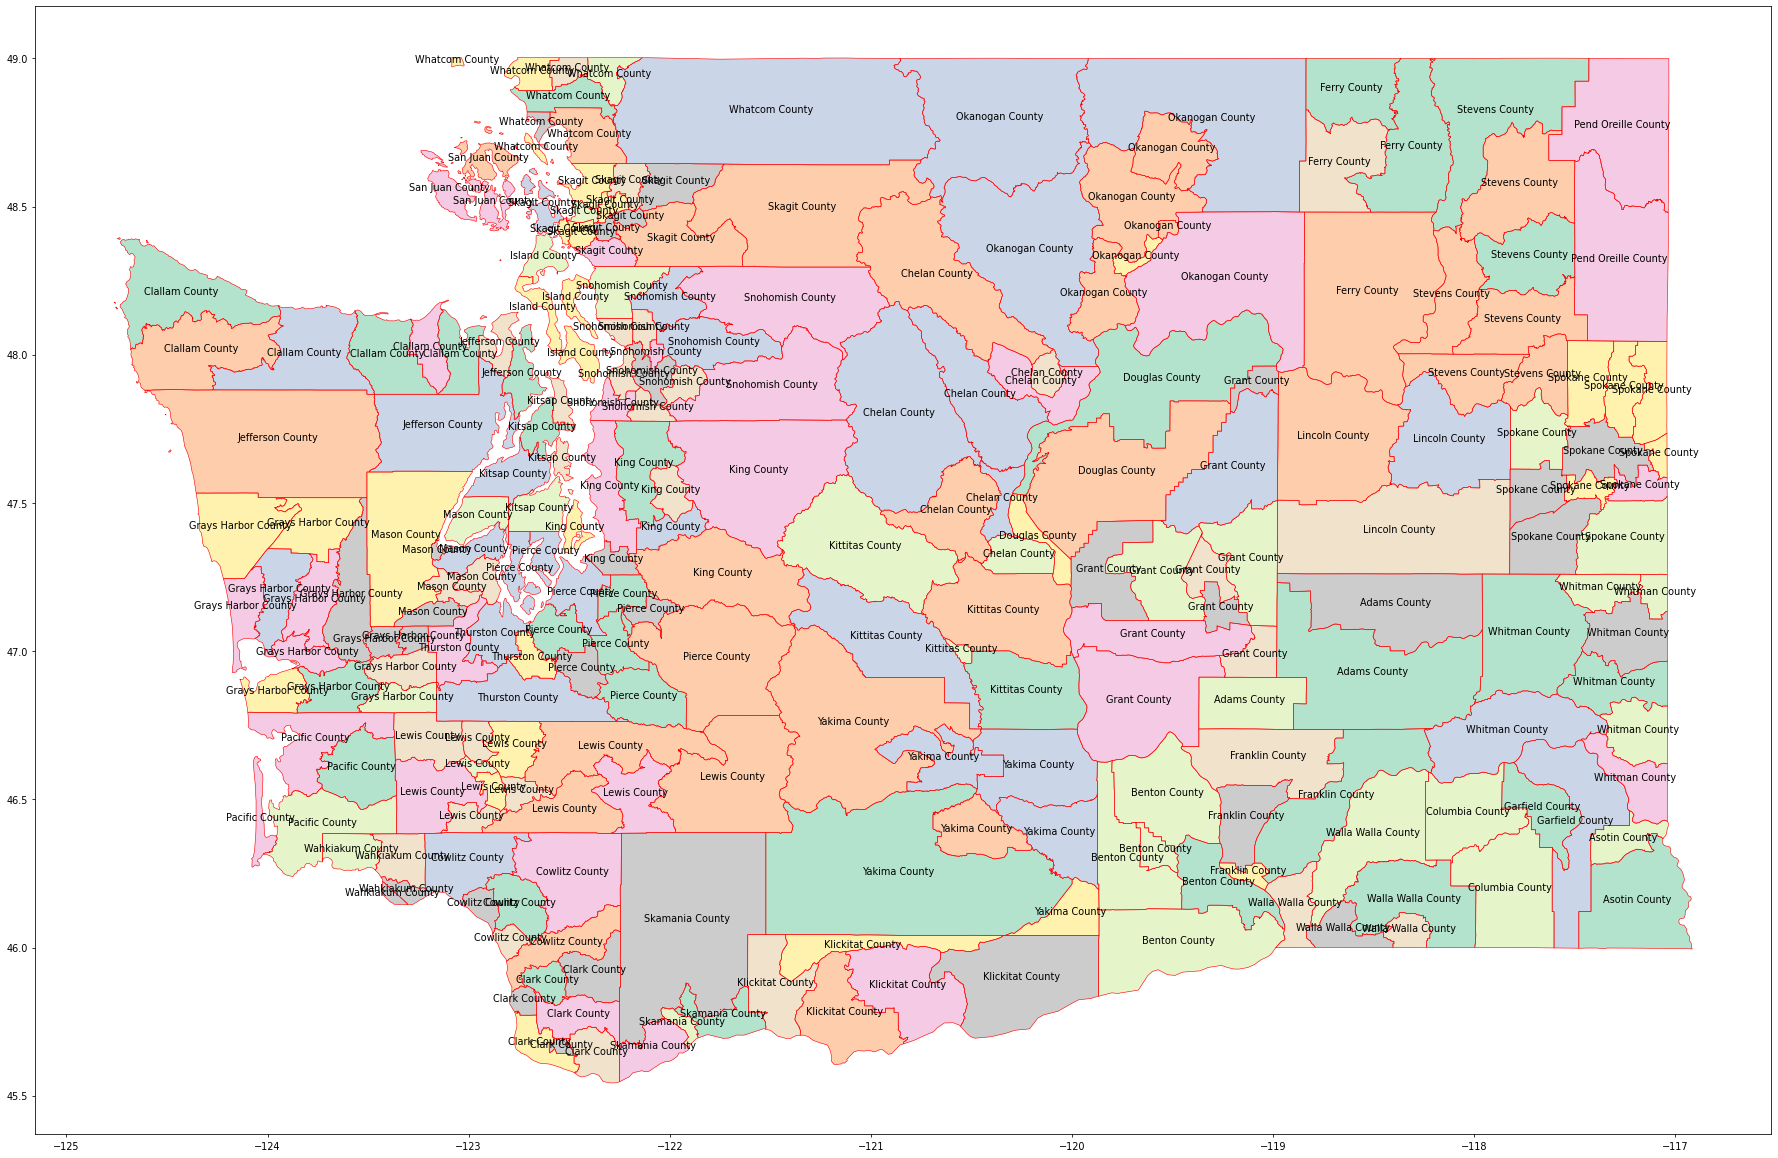

In [35]:
fig = plt.figure(2, figsize=(32, 32), dpi=70) 
ax = fig.add_subplot()

wa.apply(lambda x: ax.annotate(x.NAMELSADCO, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10), axis=1)
wa.boundary.plot(ax=ax, color='Red', linewidth=.6)

wa.plot(ax=ax, cmap='Pastel2', legend=True, figsize=(42, 42))

In [40]:
tornados = gpd.read_file('zip://data/1950-2018-torn-initpoint.zip!1950-2018-torn-initpoint')

In [41]:
tornados.head()

om    yr  mo  dy        date      time  tz  st  stf  stn  ...  loss  closs  \
0   1  1950   1   3  1950-01-03  11:00:00   3  MO   29    1  ...   6.0    0.0   
1   2  1950   1   3  1950-01-03  11:55:00   3  IL   17    2  ...   5.0    0.0   
2   3  1950   1   3  1950-01-03  16:00:00   3  OH   39    1  ...   4.0    0.0   
3   4  1950   1  13  1950-01-13  05:25:00   3  AR    5    1  ...   3.0    0.0   
4   5  1950   1  25  1950-01-25  19:30:00   3  MO   29    2  ...   5.0    0.0   

    slat   slon     elat     elon  len  wid  fc              geometry  
0  38.77 -90.22  38.8300 -90.0300  9.5  150   0  POINT (-90.22 38.77)  
1  39.10 -89.30  39.1200 -89.2300  3.6  130   0    POINT (-89.3 39.1)  
2  40.88 -84.58  40.8801 -84.5799  0.1   10   0  POINT (-84.58 40.88)  
3  34.40 -94.37  34.4001 -94.3699  0.6   17   0   POINT (-94.37 34.4)  
4  37.60 -90.68  37.6300 -90.6500  2.3  300   0   POINT (-90.68 37.6)  

[5 rows x 23 columns]

In [42]:
wa_tor = tornados[tornados['st'] == 'WA']

wa_tor

om    yr  mo  dy        date      time  tz  st  stf  stn  ...  \
1483      362  1954   6  15  1954-06-15  15:30:00   3  WA   53    1  ...   
2441      179  1956   5   9  1956-05-09  15:00:00   3  WA   53    1  ...   
3042      276  1957   4  30  1957-04-30  20:40:00   3  WA   53    1  ...   
3048      282  1957   5   6  1957-05-06  15:58:00   3  WA   53    2  ...   
3049      283  1957   5   6  1957-05-06  22:00:00   3  WA   53    3  ...   
...       ...   ...  ..  ..         ...       ...  ..  ..  ...  ...  ...   
60850  614230  2016   7  22  2016-07-22  16:20:00   3  WA   53    0  ...   
60885  614265  2016   8   9  2016-08-09  18:35:00   3  WA   53    0  ...   
61425  614805  2017   3  24  2017-03-24  17:10:00   3  WA   53    0  ...   
62429  615809  2017  10  12  2017-10-12  16:05:00   3  WA   53    0  ...   
63631  617011  2018  12  18  2018-12-18  15:50:00   3  WA   53    0  ...   

            loss  closs     slat      slon     elat      elon    len  wid  fc  \
1483         4.0    0.0  47.4300 -117.3800  47.4301 -117.3799   0.50  100   0   
2441         0.0    0.0  46.1000 -119.2000  46.2000 -119.0300  10.20   80   0   
3042         3.0    0.0  46.6000 -120.5000  46.6001 -120.4999   1.00   23   0   
3048         1.0    0.0  47.4500 -118.2500  47.4501 -118.2499   0.70   17   0   
3049         2.0    0.0  47.4800 -117.2000  47.4801 -117.1999   1.50   23   0   
...          ...    ...      ...       ...      ...       ...    ...  ...  ..   
60850        0.0    0.0  47.6611 -117.5603  47.6611 -117.5603   0.20   50   0   
60885        0.0    0.0  47.6505 -117.6196  47.6505 -117.6196   0.20   25   0   
61425     2000.0    0.0  45.6723 -122.5651  45.6936 -122.5286   2.30   15   0   
62429     2000.0    0.0  45.7259 -122.6393  45.7242 -122.6376   0.16   25   0   
63631  1180000.0    0.0  47.5070 -122.6395  47.5181 -122.6158   1.35  285   0   

                        geometry  
1483       POINT (-117.38 47.43)  
2441         POINT (-119.2 46.1)  
3042         POINT (-120.5 46.6)  
3048       POINT (-118.25 47.45)  
3049        POINT (-117.2 47.48)  
...                          ...  
60850  POINT (-117.5603 47.6611)  
60885  POINT (-117.6196 47.6505)  
61425  POINT (-122.5651 45.6723)  
62429  POINT (-122.6393 45.7259)  
63631   POINT (-122.6395 47.507)  

[119 rows x 23 columns]

<Axes: >

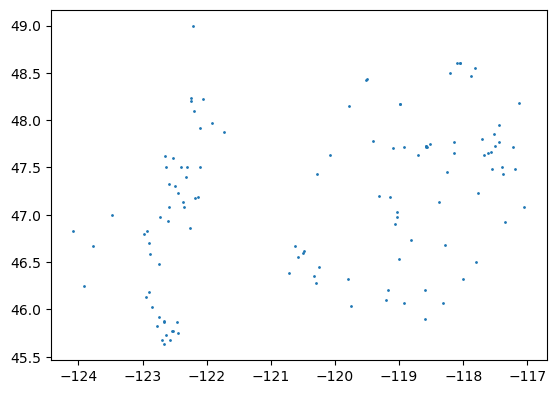

In [44]:
wa_tor.plot(markersize=1, legend=True)

In [47]:
minx, miny, maxx, maxy = wa.total_bounds
print(minx, miny, maxx, maxy)

-124.763068 45.543541 -116.915989 49.002494


In [50]:
from pyproj import Transformer

# Set up transformer from lat/lon to EPSG:3857
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

minx, miny = transformer.transform(-124.763068, 45.543541)
maxx, maxy = transformer.transform(-116.915989, 49.002494)

print(minx, miny, maxx, maxy)

-13888561.199566564 5707500.65707957 -13015028.361071974 6275284.584221339


<Axes: >

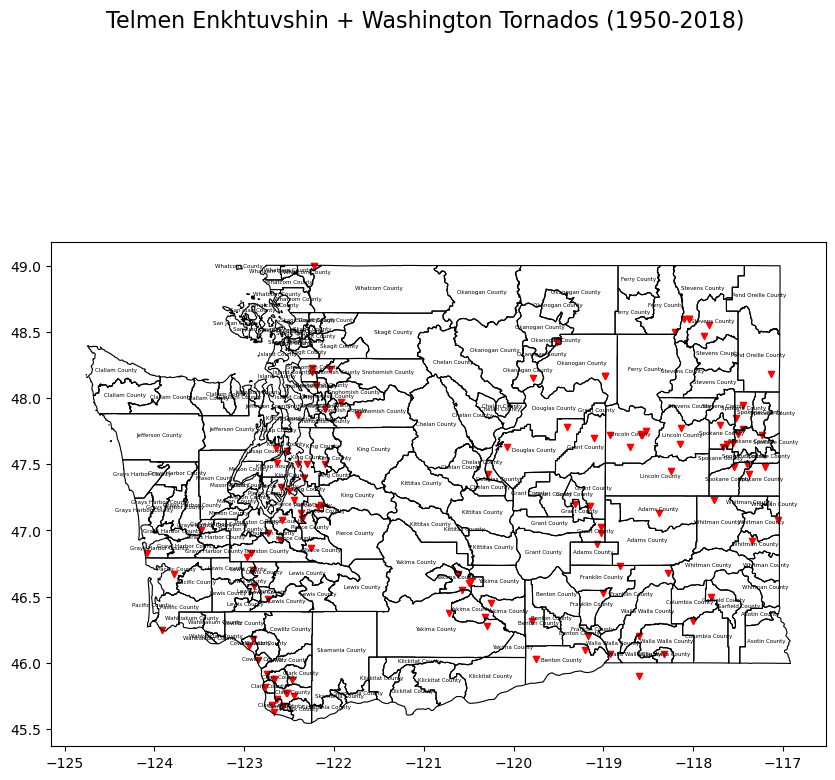

In [56]:
fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()


fig.suptitle('Telmen Enkhtuvshin + Washington Tornados (1950-2018)', fontsize=16)
wa.apply(lambda x: ax.annotate(x.NAMELSADCO, xy=x.geometry.centroid.coords[0], ha='center', fontsize=4), axis=1)
wa.boundary.plot(ax=ax, color='black', linewidth=.8)

wa_tor.plot(ax=ax, color='red', marker='v', markersize=20)

In [57]:
wa = wa.to_crs(epsg=3857)
wa_tor = wa_tor.to_crs(epsg=3857)

In [58]:
# Assign each tornado point to its polygon
joined = gpd.sjoin(wa_tor, wa, how="inner", predicate='within')

In [59]:
# Group by county name
tor_count = joined.groupby('NAMELSADCO').size().reset_index(name='tornado_count')

In [60]:
tor_count

NAMELSADCO  tornado_count
0          Adams County              2
1         Benton County              4
2          Clark County             11
3       Columbia County              1
4        Cowlitz County              4
5        Douglas County              3
6          Ferry County              1
7       Franklin County              3
8       Garfield County              1
9          Grant County              5
10  Grays Harbor County              2
11          King County              3
12        Kitsap County              3
13         Lewis County              3
14       Lincoln County             10
15      Okanogan County              5
16       Pacific County              1
17  Pend Oreille County              1
18        Pierce County              8
19     Snohomish County              7
20       Spokane County             13
21       Stevens County              5
22      Thurston County              4
23   Walla Walla County              3
24       Whatcom County              1
25       Whitman County              3
26        Yakima County              8

In [62]:
# Merge counts into the original county GeoDataFrame
wa_with_tor = wa.merge(tor_count, on='NAMELSADCO', how='left')

# Fill NaNs (no tornadoes) with 0
wa_with_tor['tornado_count'] = wa_with_tor['tornado_count'].fillna(0).astype(int)

# Filter counties with tornadoes
wa_tor_only = wa_with_tor[wa_with_tor['tornado_count'] > 0]

Text(0.5, 1.0, 'Washington Counties with Tornadoes (1950–2018)')

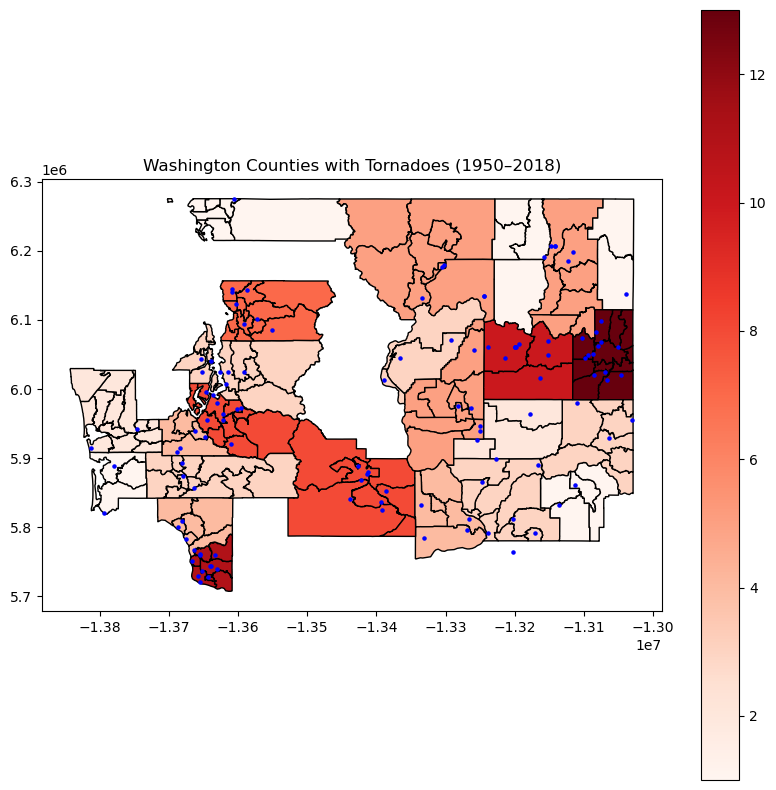

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
wa_tor_only.plot(ax=ax, column='tornado_count', cmap='Reds', legend=True, edgecolor='black')
wa_tor.plot(ax=ax, color='blue', marker='o', markersize=5)
ax.set_title("Washington Counties with Tornadoes (1950–2018)")


## 1: Washington Tornadoes by county

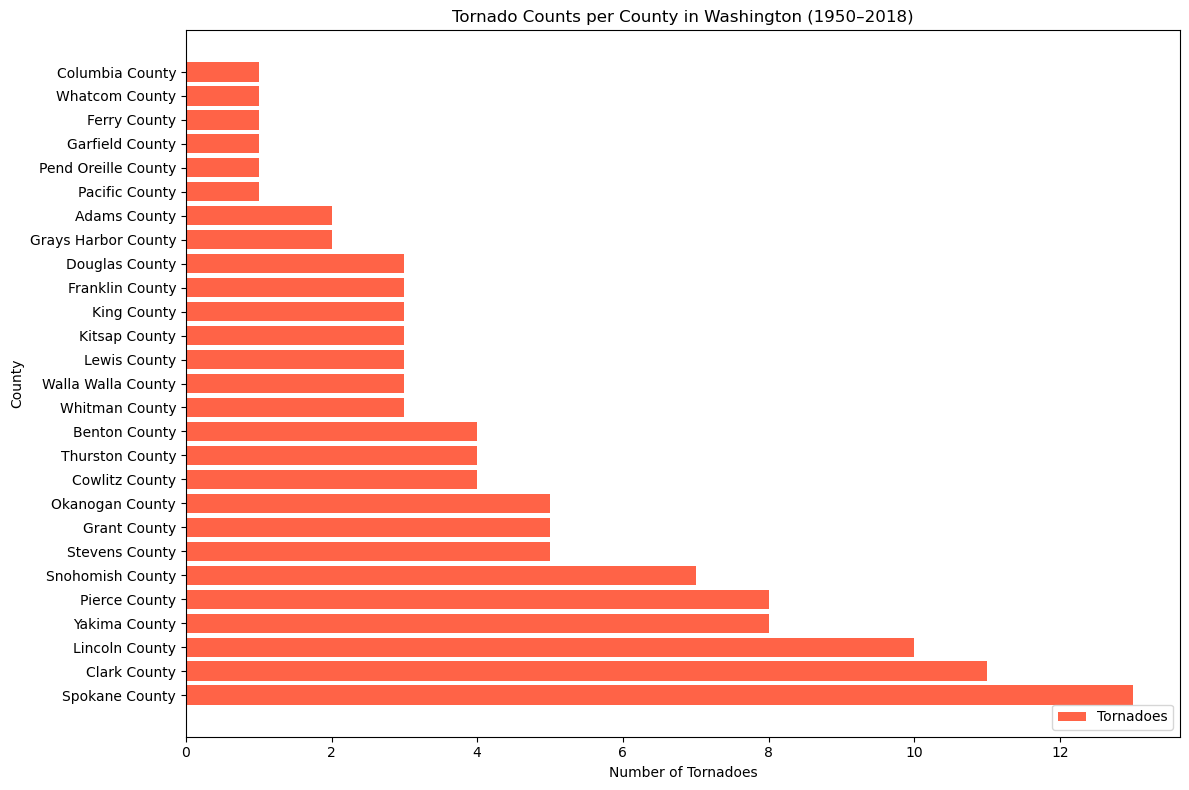

In [119]:
# Sort counties by number of tornadoes (optional)
tor_count_sorted = tor_count.sort_values(by='tornado_count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(tor_count_sorted['NAMELSADCO'], tor_count_sorted['tornado_count'], color='tomato', label="Tornadoes")
plt.xlabel('Number of Tornadoes')
plt.ylabel('County')
plt.title('Tornado Counts per County in Washington (1950–2018)')
plt.tight_layout()
plt.legend(loc=4)
plt.savefig('wa_tornado_counts.png', dpi=300, bbox_inches='tight')
plt.show()

The top 5 counties wtih the most tornoadoes are Spokane, Clark, Lincoln, Yakima, and Pierce counties. Overall, there is not many tornado occurences in the Washington state.

## 2: California State County Tornadoes

In [90]:
ca = gdf[gdf['STUSPS'] == 'CA']

In [91]:
ca_tor = tornados[tornados.intersects(ca.unary_union)]
ca = ca.to_crs(epsg=4326)
ca_tor = ca_tor.to_crs(epsg=4326)
ca_tor_joined = gpd.sjoin(ca_tor, ca, how='inner', predicate='intersects')
ca_tor_count = ca_tor_joined.groupby('NAMELSADCO').size().reset_index(name='tornado_count')


/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_46962/2383075928.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  ca_tor = tornados[tornados.intersects(ca.unary_union)]


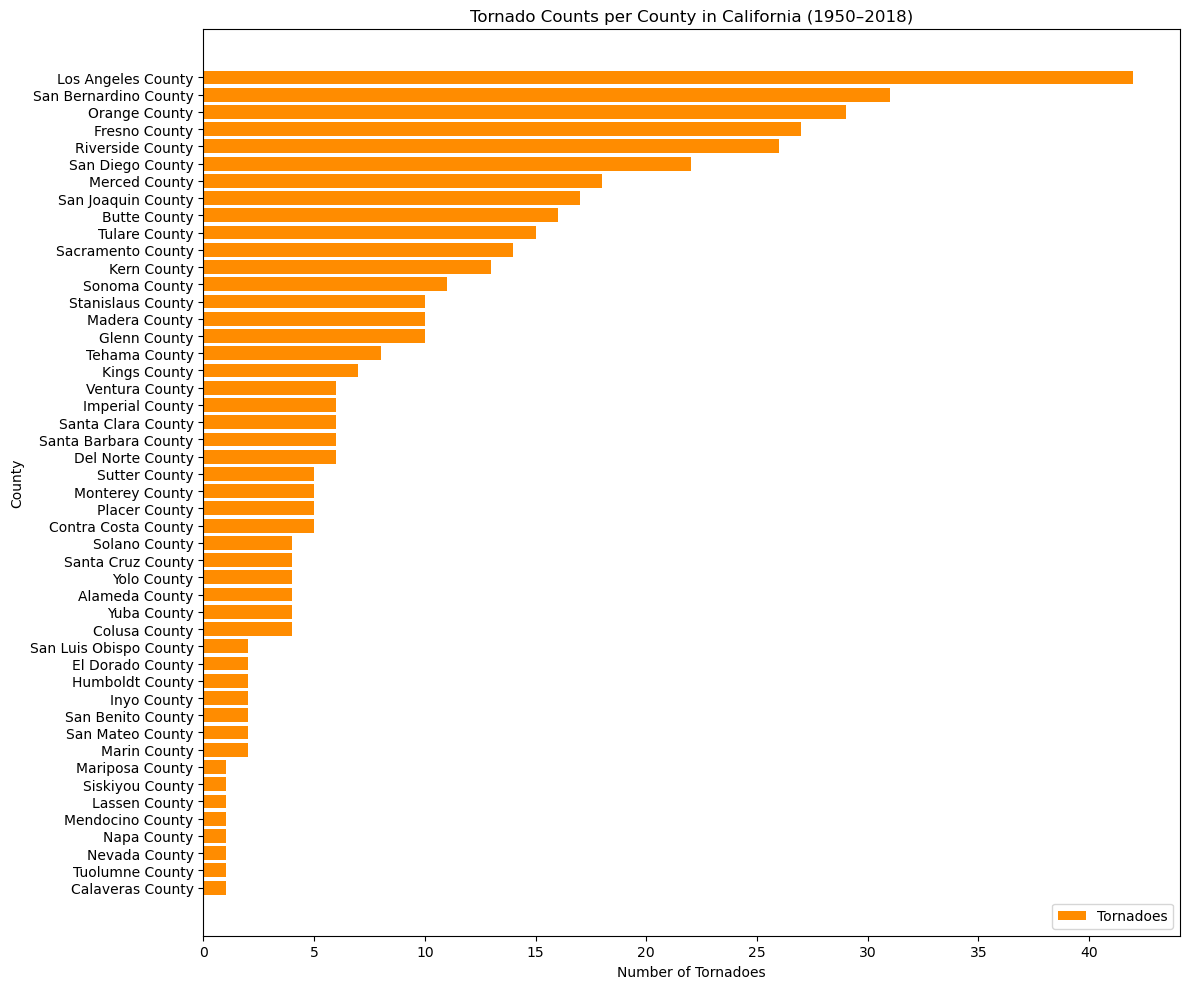

In [102]:
# Sort by number of tornadoes
ca_tor_count_sorted = ca_tor_count.sort_values(by='tornado_count', ascending=False)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(ca_tor_count_sorted['NAMELSADCO'], ca_tor_count_sorted['tornado_count'], color='darkorange', label='Tornadoes')
plt.xlabel('Number of Tornadoes')
plt.ylabel('County')
plt.legend(loc=4)
plt.title('Tornado Counts per County in California (1950–2018)')
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the figure (optional)
plt.savefig('ca_tornado_counts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

It seems like the county with the most tornado occurences is Los Angeles county but the county with the least occurences is Calaveras County. However, the Los Angeles County is clearly an outlier.

# 3: Oregon State County Tornadoes

In [87]:
org = gdf[gdf['STUSPS'] == 'OR']

In [88]:
org_tor = tornados[tornados.intersects(org.unary_union)]
org = org.to_crs(epsg=4326)
org_tor = org_tor.to_crs(epsg=4326)
org_tor_joined = gpd.sjoin(org_tor, org, how='inner', predicate='intersects')
org_tor_count = org_tor_joined.groupby('NAMELSADCO').size().reset_index(name='tornado_count')


/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_46962/1108381336.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  org_tor = tornados[tornados.intersects(org.unary_union)]


In [89]:
org_tor_count

NAMELSADCO  tornado_count
0        Baker County              4
1       Benton County              1
2    Clackamas County              5
3      Clatsop County              4
4     Columbia County              3
5        Curry County              2
6    Deschutes County              6
7      Douglas County              1
8      Gilliam County              1
9        Grant County              2
10      Harney County              5
11   Jefferson County              2
12     Klamath County              4
13        Lake County              2
14        Lane County              7
15     Lincoln County              3
16        Linn County              4
17     Malheur County              9
18      Marion County             11
19      Morrow County              2
20   Multnomah County              5
21        Polk County              2
22   Tillamook County              6
23    Umatilla County              6
24       Union County              1
25     Wallowa County              5
26       Wasco County              1
27  Washington County              4
28     Wheeler County              1
29     Yamhill County              4

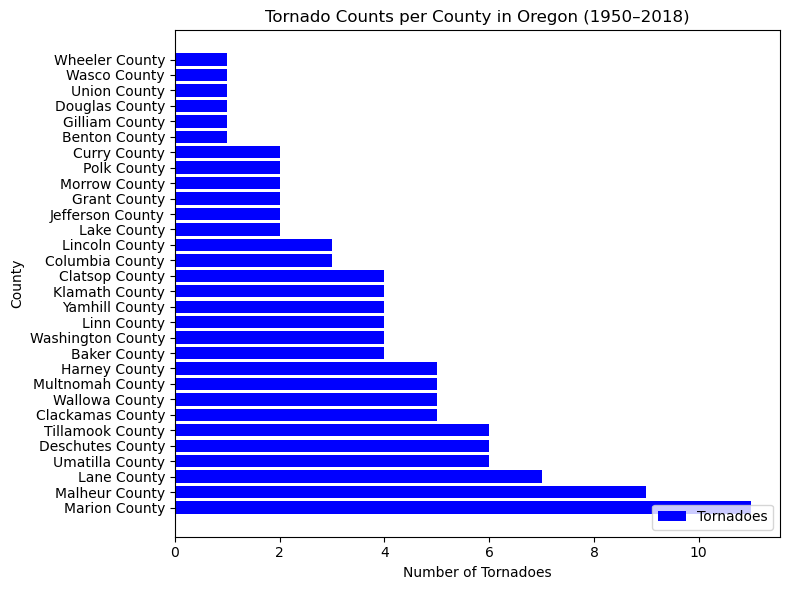

In [120]:
# Sort by number of tornadoes
org_tor_count_sorted = org_tor_count.sort_values(by='tornado_count', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(org_tor_count_sorted['NAMELSADCO'], org_tor_count_sorted['tornado_count'], color='blue', label='Tornadoes')
plt.xlabel('Number of Tornadoes')
plt.ylabel('County')
plt.title('Tornado Counts per County in Oregon (1950–2018)')
plt.tight_layout()
plt.legend(loc=4)

# Save the figure (optional)
plt.savefig('org_tornado_counts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Compared to other states, Oregon does not have any major number of tornadoes, but the Marion County is the highest where Wheeler County has the least number of tornadoes.

# 3: New York State County Tornadoes

In [94]:
ny = gdf[gdf['STUSPS'] == 'NY']

In [96]:
ny_tor = tornados[tornados.intersects(ny.unary_union)]
ny = ny.to_crs(epsg=4326)
ny_tor = ny_tor.to_crs(epsg=4326)
ny_tor_joined = gpd.sjoin(ny_tor, ny, how='inner', predicate='intersects')
ny_tor_count = ny_tor_joined.groupby('NAMELSADCO').size().reset_index(name='tornado_count')


/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_46962/4170505089.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  ny_tor = tornados[tornados.intersects(ny.unary_union)]


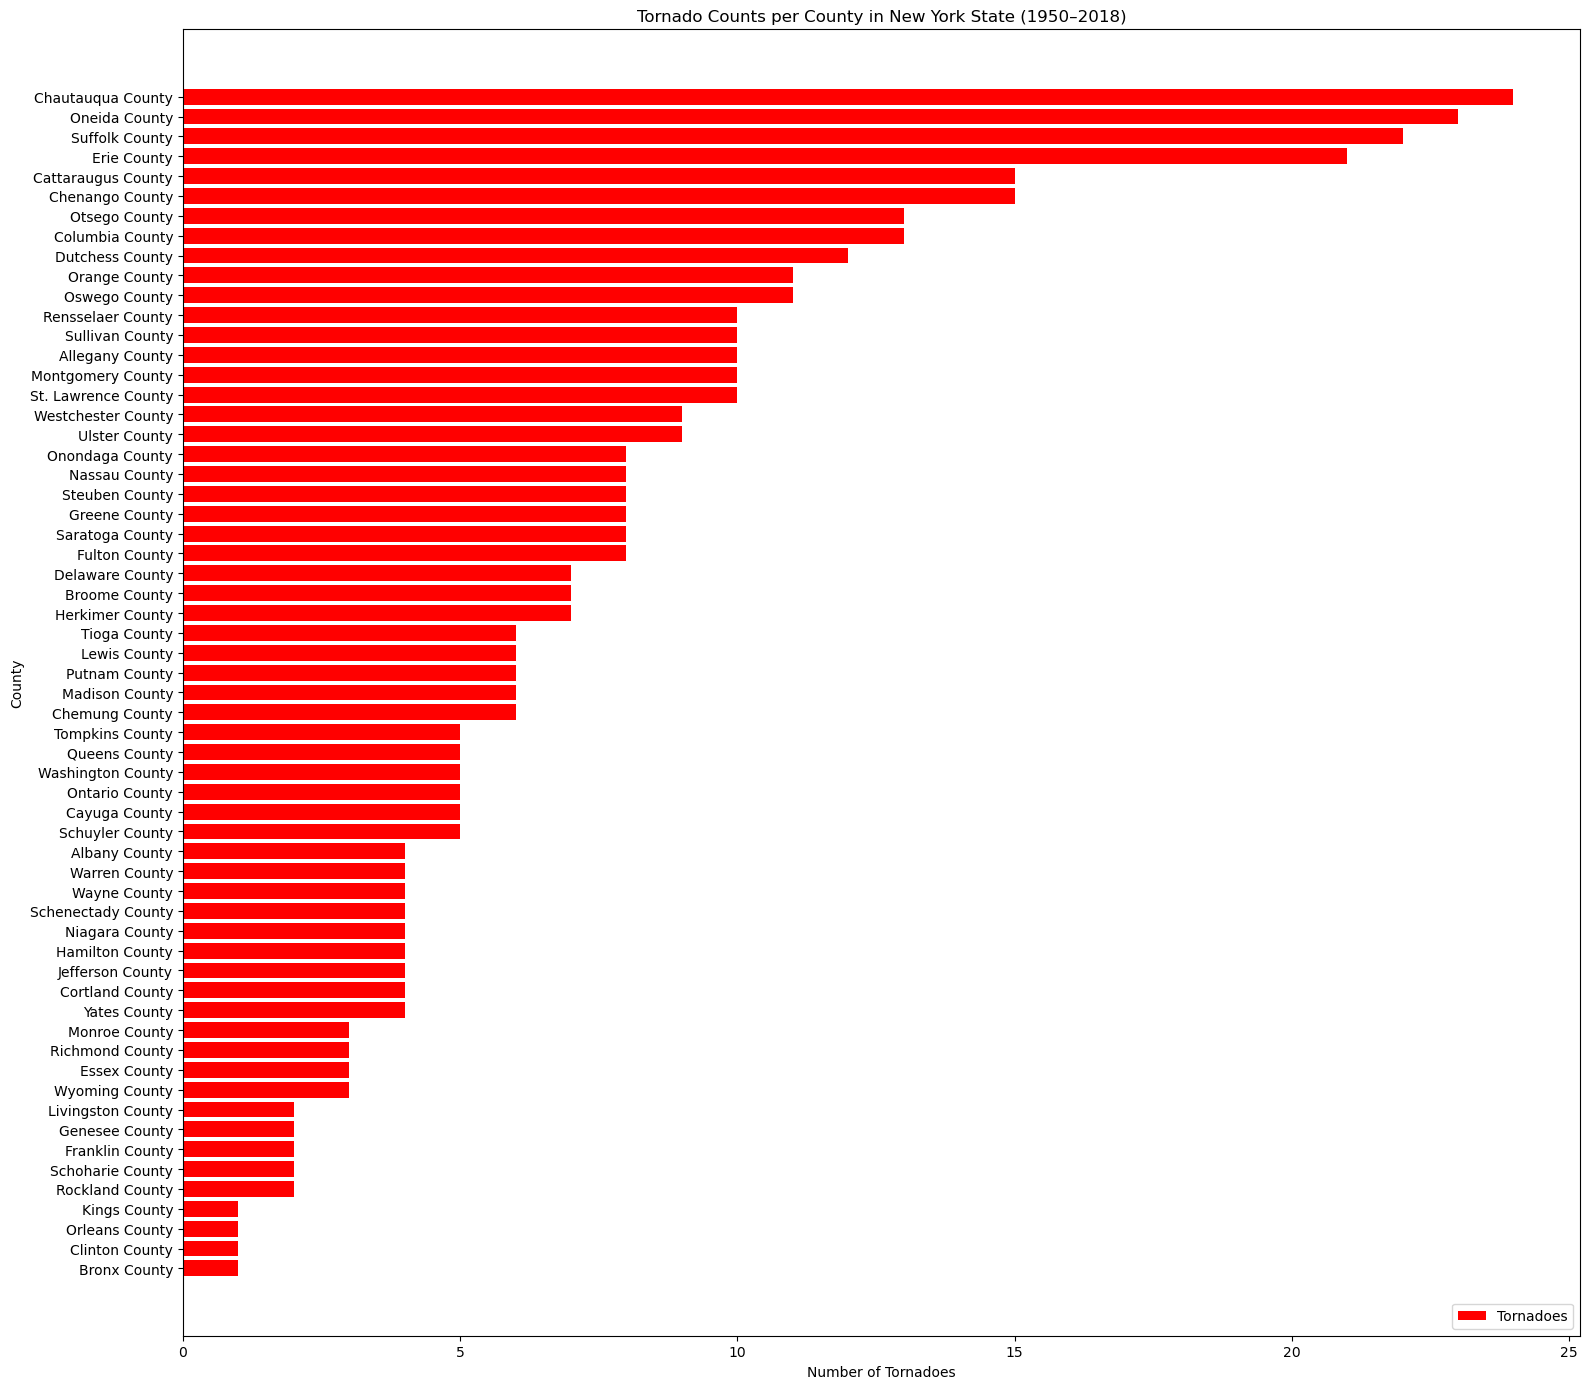

In [110]:
# Sort by number of tornadoes
ny_tor_count_sorted = ny_tor_count.sort_values(by='tornado_count', ascending=False)

# Plot
plt.figure(figsize=(16, 14))
plt.barh(ny_tor_count_sorted['NAMELSADCO'], ny_tor_count_sorted['tornado_count'], color='red', label='Tornadoes')
plt.xlabel('Number of Tornadoes')
plt.ylabel('County')
plt.title('Tornado Counts per County in New York State (1950–2018)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.legend(loc=4)

# Save the figure (optional)
plt.savefig('ny_tornado_counts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Looks like there are many occurences of tornadoes here. The top 5 Counties here are, Chautauqua, Oneida, Suffolk, Erie, Cattaraugus Counties.

# 4: Florida State County Tornadoes


In [115]:
fl = gdf[gdf['STUSPS'] == 'FL']

In [116]:
fl_tor = tornados[tornados.intersects(fl.unary_union)]
fl = fl.to_crs(epsg=4326)
fl_tor = fl_tor.to_crs(epsg=4326)
fl_tor_joined = gpd.sjoin(fl_tor, fl, how='inner', predicate='intersects')
fl_tor_count = fl_tor_joined.groupby('NAMELSADCO').size().reset_index(name='tornado_count')


/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_46962/4186666416.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  fl_tor = tornados[tornados.intersects(fl.unary_union)]


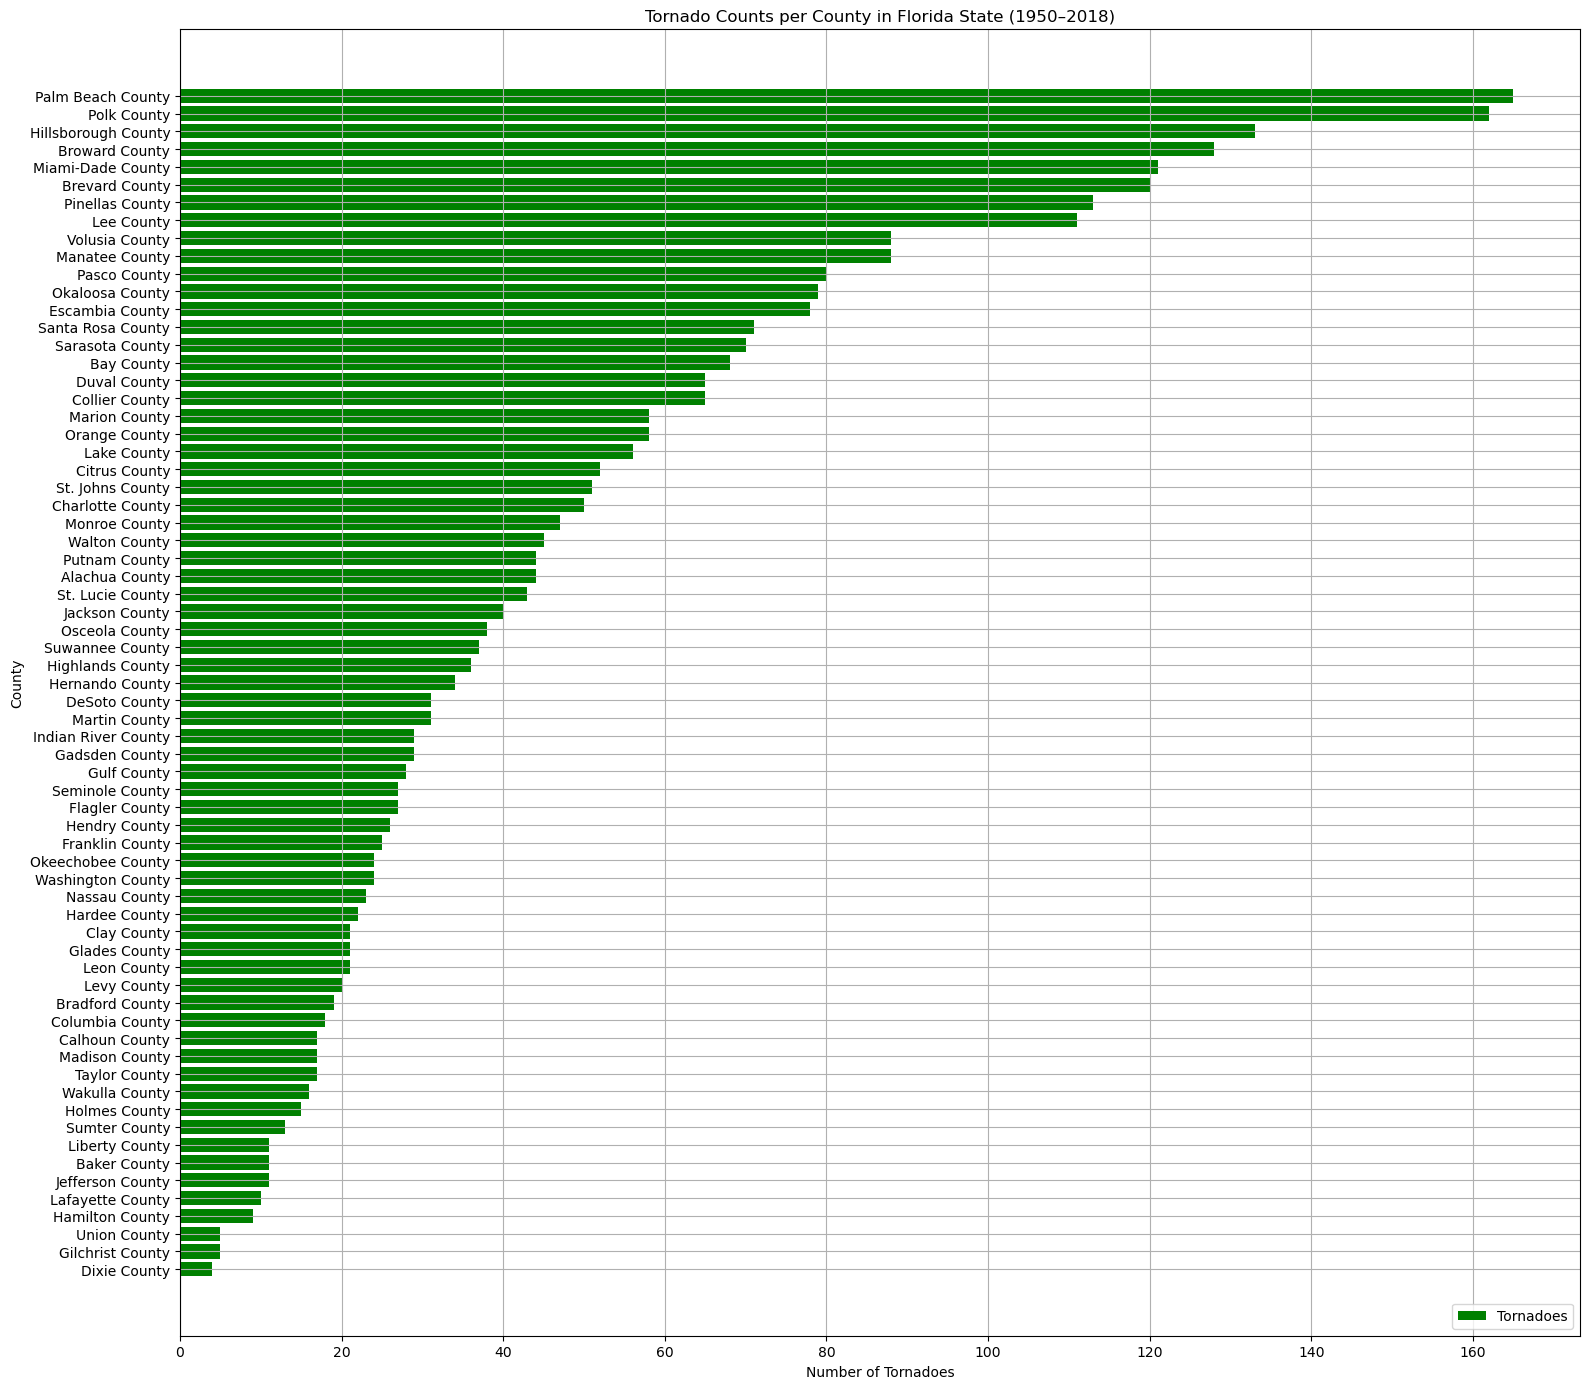

In [118]:
# Sort by number of tornadoes
fl_tor_count_sorted = fl_tor_count.sort_values(by='tornado_count', ascending=False)

# Plot
plt.figure(figsize=(16, 14))
plt.barh(fl_tor_count_sorted['NAMELSADCO'], fl_tor_count_sorted['tornado_count'], color='green', label='Tornadoes')
plt.xlabel('Number of Tornadoes')
plt.ylabel('County')
plt.title('Tornado Counts per County in Florida State (1950–2018)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.legend(loc=4)
plt.grid()

# Save the figure (optional)
plt.savefig('fl_tornado_counts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

There are many occurences in Florida State and the most is Palm Beach County wiht least as Dixie County.

# Continguous U.S. Top Tornado Counties

/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_46962/3810273732.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  tor_contig = tornados[tornados.intersects(gdf.unary_union)]
/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_46962/3810273732.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  tor_joined = gpd.sjoin(tor_contig, gdf, how='inner', predicate='intersects')


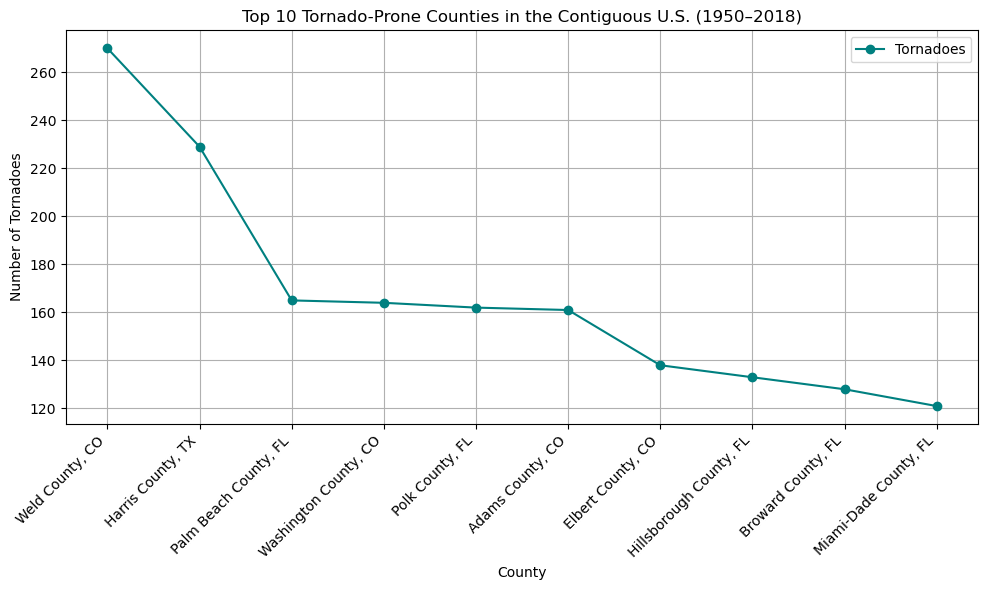

In [127]:
# Spatial join to match tornadoes to counties
tor_contig = tornados[tornados.intersects(gdf.unary_union)]
tor_joined = gpd.sjoin(tor_contig, gdf, how='inner', predicate='intersects')

# Count tornadoes per county (include state for clarity)
us_tor_count = tor_joined.groupby(['NAMELSADCO', 'STUSPS']).size().reset_index(name='tornado_count')

# Get top 10
top10 = us_tor_count.sort_values(by='tornado_count', ascending=False).head(10)
top10['label'] = top10['NAMELSADCO'] + ', ' + top10['STUSPS']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(top10['label'], top10['tornado_count'], marker='o', linestyle='-', color='teal', label='Tornadoes')
plt.xticks(rotation=45, ha='right')
plt.xlabel('County')
plt.ylabel('Number of Tornadoes')
plt.title('Top 10 Tornado-Prone Counties in the Contiguous U.S. (1950–2018)')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='best')

# Save
plt.savefig('top10_us_tornado_linechart.png', dpi=300, bbox_inches='tight')

plt.show()

This is hte ploy for ranking the top 10 counties with the most number of tornadoes in the history dataset. At #1 is Weld County, CO with over 260 occurences and top 10 at the least is Miami-Dade Cunty, FL with around 120 occurences. In this graph, there are only Colorado, Texas, and Florida states.